In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rnn_numpy import *

In [5]:
EPOCH = 20000
dim = 8
largest_number = 2 ** dim - 1
losses = []
rnn = RNNLayer(input_dim=2,
               hidden_dim=16,
               output_dim=1,
               input_length=dim,
               activator=Sigmoid(),
               learning_rate=0.1)

epoch:0
Loss:0.7072181333142943
Pred:[[1. 0. 0. 0. 0. 0. 0. 0.]]
True:[[1. 1. 0. 0. 1. 1. 0. 0.]]
------------------------
epoch:1000
Loss:0.6257952919658986
Pred:[[1. 1. 1. 1. 0. 0. 0. 0.]]
True:[[1. 0. 1. 1. 0. 1. 1. 0.]]
------------------------
epoch:2000
Loss:0.7091052116515607
Pred:[[1. 1. 1. 1. 1. 1. 1. 1.]]
True:[[1. 0. 0. 1. 0. 0. 1. 1.]]
------------------------
epoch:3000
Loss:0.7048670398583705
Pred:[[1. 0. 1. 1. 0. 1. 0. 0.]]
True:[[1. 0. 1. 0. 1. 0. 1. 0.]]
------------------------
epoch:4000
Loss:0.6025099479700351
Pred:[[0. 0. 0. 0. 0. 1. 0. 1.]]
True:[[0. 0. 1. 0. 1. 0. 1. 1.]]
------------------------
epoch:5000
Loss:0.6525828072015498
Pred:[[0. 1. 0. 1. 0. 1. 1. 0.]]
True:[[1. 1. 0. 0. 1. 1. 1. 0.]]
------------------------
epoch:6000
Loss:0.5371515335293326
Pred:[[0. 0. 0. 0. 1. 1. 0. 0.]]
True:[[0. 1. 0. 0. 1. 1. 0. 1.]]
------------------------
epoch:7000
Loss:0.6938667202340634
Pred:[[1. 1. 0. 1. 1. 1. 0. 0.]]
True:[[1. 1. 0. 0. 0. 0. 1. 0.]]
--------------------

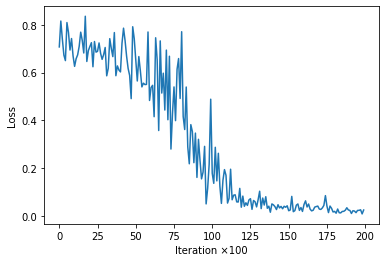

In [6]:
for epoch in range(EPOCH):  
    a_int = np.random.randint(largest_number / 2)
    b_int = np.random.randint(largest_number / 2)
    c_int = a_int + b_int
    a_binary = int2binary(a_int, dim)
    b_binary = int2binary(b_int, dim)
    c_binary = int2binary(c_int, dim)
    input_matrix = np.concatenate((a_binary, b_binary), axis=0).reshape(
        (2, dim))
    rnn.forward(input_matrix)
    rnn.backward(c_binary)
    rnn.update()
    if epoch % 100 == 0:
        loss = rnn.calc_loss(c_binary)
        losses.append(loss)

    if epoch % 1000 == 0:
        loss = rnn.calc_loss(c_binary)
        print("epoch:{}".format(epoch))
        print("Loss:{}".format(loss))
        print("Pred:" + str(rnn.prediction))
        print("True:" + str(c_binary))
        print("------------------------")
plt.plot(losses)
plt.xlabel("Iteration ×100")
plt.ylabel("Loss")
plt.show()

In [7]:
def test(dim,rnn):
    NUMBER = 100
    correct = 0
    largest_number = 2**dim - 1
    for i in range(NUMBER):
        a_int = np.random.randint(largest_number / 2)
        b_int = np.random.randint(largest_number / 2)
        c_int = a_int + b_int
        a_binary = int2binary(a_int, dim)
        b_binary = int2binary(b_int, dim)
        c_binary = int2binary(c_int, dim)
        input_matrix = np.concatenate((a_binary, b_binary), axis=0).reshape(
            (2, dim))
        rnn.forward(input_matrix)
        if(np.sum(rnn.prediction - c_binary) == 0):
            correct += 1
        if i % 10 == 0:
            print("Input a:{:6} {}".format(a_int,a_binary))
            print("Input b:{:6} {}".format(b_int,b_binary))
            print("Predict c:{:6} {}".format(binary2int(rnn.prediction, dim),rnn.prediction))
            print("True c:   {:6} {}".format(c_int,c_binary))
            print("-----------------------------------------")
    print("Test accuracy:{}".format(correct/NUMBER))

In [8]:
# 用8位二进制数训练，16位二进制数测试
rnn2 = RNNLayer(input_dim=2,
               hidden_dim=16,
               output_dim=1,
               input_length=16,
               activator=Sigmoid(),
               learning_rate=0.1)
rnn2.change_parameter(rnn.U,rnn.W,rnn.V)

In [11]:
test(16,rnn2)

Input a: 25641 [[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]
Input b: 18563 [[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]]
Predict c:44204.0 [[0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]]
True c:    44204 [[0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]]
-----------------------------------------
Input a: 25158 [[0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]]
Input b:  5794 [[0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.]]
Predict c:30952.0 [[0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]]
True c:    30952 [[0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]]
-----------------------------------------
Input a: 17092 [[0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.]]
Input b: 30657 [[1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.]]
Predict c:47749.0 [[1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.]]
True c:    47749 [[1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.]]
-----------------------------------------
Input a:  9230 [[0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.